<a href="https://colab.research.google.com/github/ohbigkite/2023_LG_AImers/blob/main/%5B%ED%83%9C%EC%97%B0%5D%20Timeseries_kmeans_train_0812.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/LG_Aimers

/content/drive/MyDrive/LG_Aimers


In [ ]:
pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.5/368.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import pandas as pd

In [ ]:
train_data = pd.read_csv('train.csv').drop(columns=['ID', '제품'])

In [ ]:
# 숫자형 변수들의 min-max scaling을 수행하는 코드입니다.
numeric_cols = train_data.columns[4:]
# 칵 column의 min 및 max 계산
min_values = train_data[numeric_cols].min(axis=1)
max_values = train_data[numeric_cols].max(axis=1)
# 각 행의 범위(max-min)를 계산하고, 범위가 0인 경우 1로 대체
ranges = max_values - min_values
ranges[ranges == 0] = 1
# min-max scaling 수행
train_data[numeric_cols] = (train_data[numeric_cols].subtract(min_values, axis=0)).div(ranges, axis=0)
# max와 min 값을 dictionary 형태로 저장
scale_min_dict = min_values.to_dict()
scale_max_dict = max_values.to_dict()

In [ ]:
train = train_data.iloc[:,4:].to_numpy().reshape(15890,459)

In [ ]:
train.shape

(15890, 459)

<Axes: xlabel='clusters'>

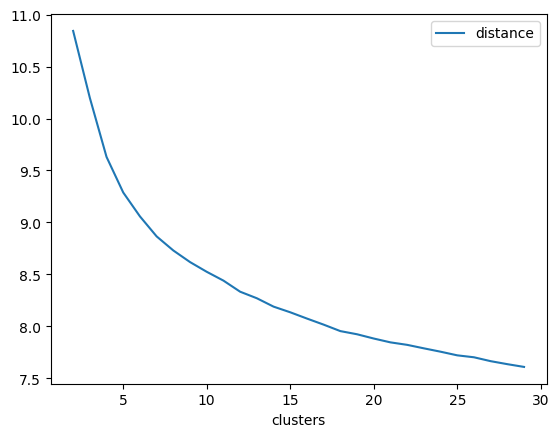

In [ ]:
elbow_data = []
for n_clusters in range (2,30):
    km = TimeSeriesKMeans(n_clusters=n_clusters, verbose=False, random_state=42,n_jobs=-1)
    y_pred = km.fit_predict(train)
    elbow_data.append((n_clusters, km.inertia_))

pd.DataFrame(elbow_data,columns=['clusters', 'distance']).plot(x='clusters',y='distance')

In [ ]:
# 군집개수 7로 설정
km = TimeSeriesKMeans(n_clusters=7, verbose=False, random_state=42, n_jobs=-1)
y_pred = km.fit_predict(train)

In [ ]:
y_pred.shape

(15890,)

In [ ]:
np.unique(y_pred, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([1358, 7135, 1692,  723, 1175, 1612, 2195]))

In [ ]:
cl_train = train_data
cl_train['cluster'] = y_pred

In [ ]:
cl_train.to_csv('train_cluster.csv', encoding = 'cp949')
cl_train.loc[:,['대분류','중분류','소분류','브랜드','cluster']].to_csv('train_cluster_only.csv', encoding = 'cp949')

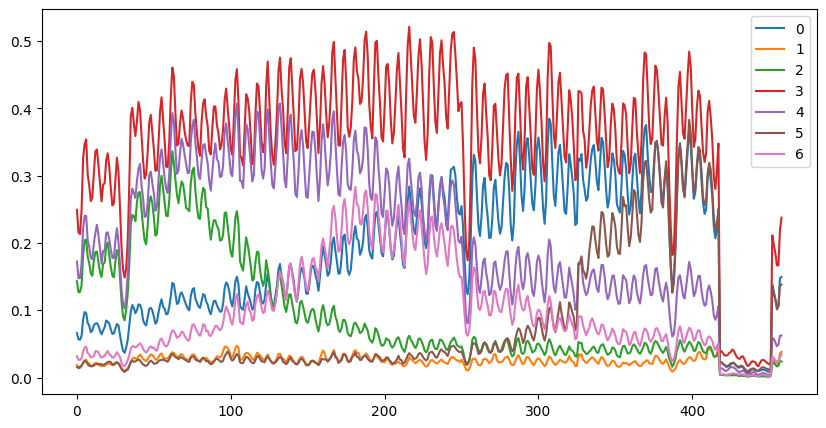

In [ ]:
# 군집에 따른 시계열 변화 시각화 - 판매량 평균
import matplotlib.pyplot as plt

big = cl_train.iloc[:,4:464]
big = big.groupby(['cluster']).mean()

plt.figure(figsize = (10,5))

for i in range(7):
    plt.plot(range(big.shape[1]), big.iloc[i,:], label = big.index[i])
    plt.legend()


# 대분류별 시각화

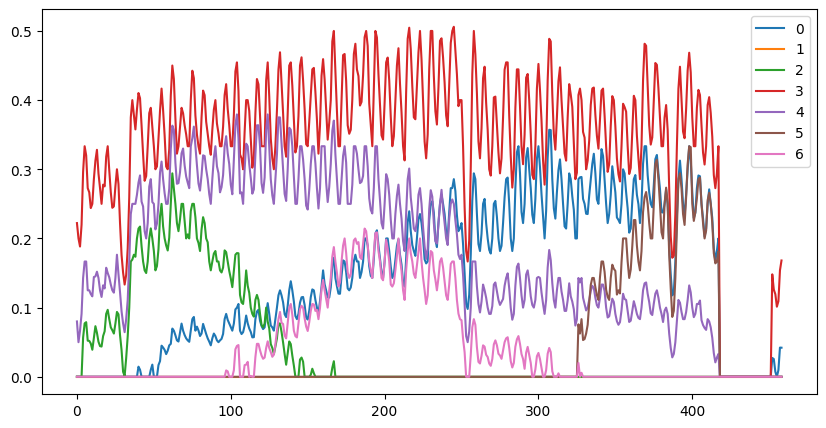

In [ ]:
# 대분류에 따른 시계열 변화 시각화 - 판매량 median
big = cl_train.iloc[:,4:464]
big = big.groupby(['cluster']).median()

plt.figure(figsize = (10,5))

for i in range(7):
    plt.plot(range(big.shape[1]), big.iloc[i,:], label = big.index[i])
    plt.legend()


<ipython-input-94-c5e20e9d90b4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  big = train_data.groupby(['대분류']).mean()


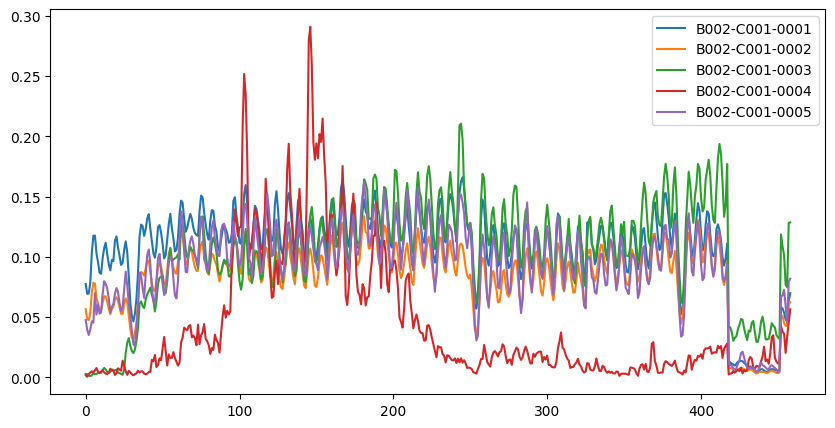

In [ ]:
# 대분류에 따른 시계열 변화 시각화 - 판매량 평균
big = train_data.groupby(['대분류']).mean()

big = big.T

plt.figure(figsize = (10,5))

for i in range(5):
    plt.plot(range(big.shape[0]), big.iloc[:,i], label = big.columns[i])
    plt.legend()


<ipython-input-102-9cb500ba4d99>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  big = train_data.groupby(['대분류']).median()


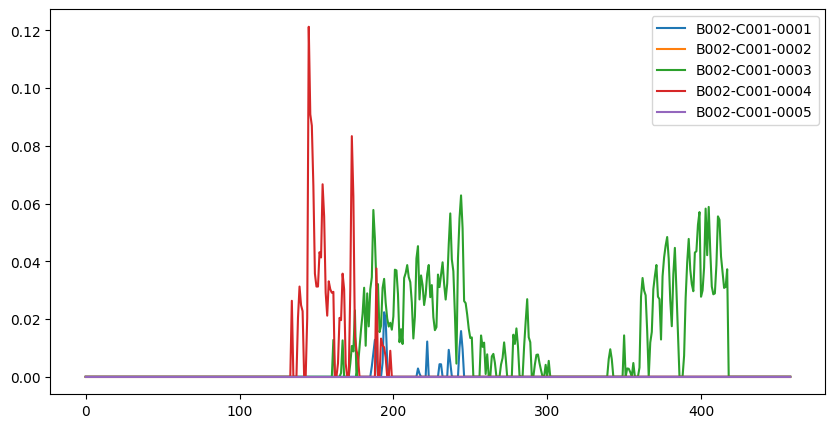

In [ ]:
# 대분류에 따른 시계열 변화 시각화 - 판매량 median
big = train_data.groupby(['대분류']).median()

big = big.T

plt.figure(figsize = (10,5))

for i in range(5):
    plt.plot(range(big.shape[0]), big.iloc[:,i], label = big.columns[i])
    plt.legend()
